# PROJECT 3 PROPOSAL LEVEL-1
# Idea: Cleaning Data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Review Data columns and data description
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Data Integrity

In [9]:
# Check for data types and inconsistencies
print(data.dtypes)
# Check for unique values and inconsistencies
print(data['neighbourhood_group'].unique())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


# Missing Data Handling

In [13]:
# Check for missing values
print(data.isnull().sum())
# Impute missing values with mean
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(), inplace=True)


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


# Duplicate Removal

In [14]:
# Check for duplicate records
print(data.duplicated().sum())
# Remove duplicate records
data.drop_duplicates(inplace=True)


0


# Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['price', 'minimum_nights']] = scaler.fit_transform(data[['price', 'minimum_nights']])

# Outlier Detection

Visualize Before Outlier Removal : 


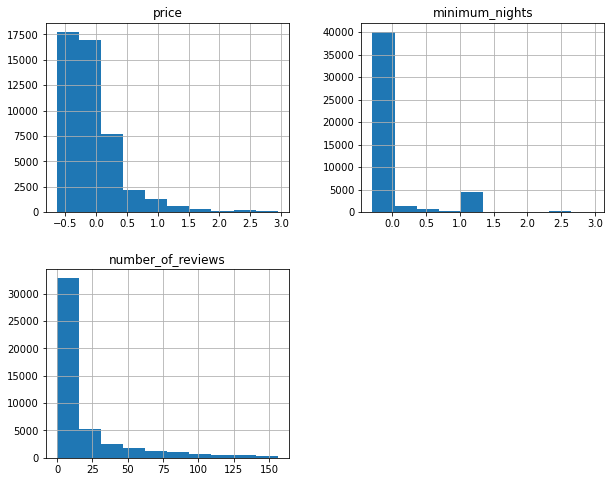

Visualize After Outlier Removal : 


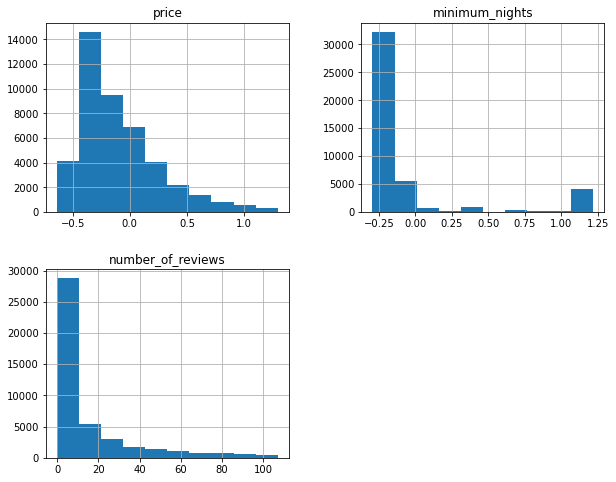

In [27]:
# Visualize distribution of numerical features to identify outliers
print('Visualize Before Outlier Removal : ')
data[['price', 'minimum_nights', 'number_of_reviews']].hist(figsize=(10, 8))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Use z-score to remove outliers
z_scores = (data[['price', 'minimum_nights', 'number_of_reviews']] - data[['price', 'minimum_nights', 'number_of_reviews']].mean()) / data[['price', 'minimum_nights', 'number_of_reviews']].std()
outliers = z_scores.abs() > 3
data_no_outliers = data[~outliers.any(axis=1)]

# Visualize distribution of numerical features after outlier removal
print('Visualize After Outlier Removal : ')
data_no_outliers[['price', 'minimum_nights', 'number_of_reviews']].hist(figsize=(10, 8))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

